In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [16]:
df_price = pd.read_csv('../input/jpx-tokyo-stock-exchange-prediction/train_files/stock_prices.csv')
df_financial = pd.read_csv('../input/jpx-tokyo-stock-exchange-prediction/train_files/financials.csv')
df_stocklist = pd.read_csv('../input/jpx-tokyo-stock-exchange-prediction/stock_list.csv')

/var/folders/1k/wj0bvnz165sfyvwsqlfxwfmw6bk41g/T/ipykernel_61118/1116028146.py:2: DtypeWarning: Columns (14,15,16,17,18,19,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df_financial = pd.read_csv('../input/jpx-tokyo-stock-exchange-prediction/train_files/financials.csv')


In [3]:
df_price.Close = df_price.Close.ffill()

In [17]:
sns.set()

In [31]:
df_price[df_price.SupervisionFlag == True].SecuritiesCode.nunique()

5

<AxesSubplot:xlabel='Date', ylabel='Close'>

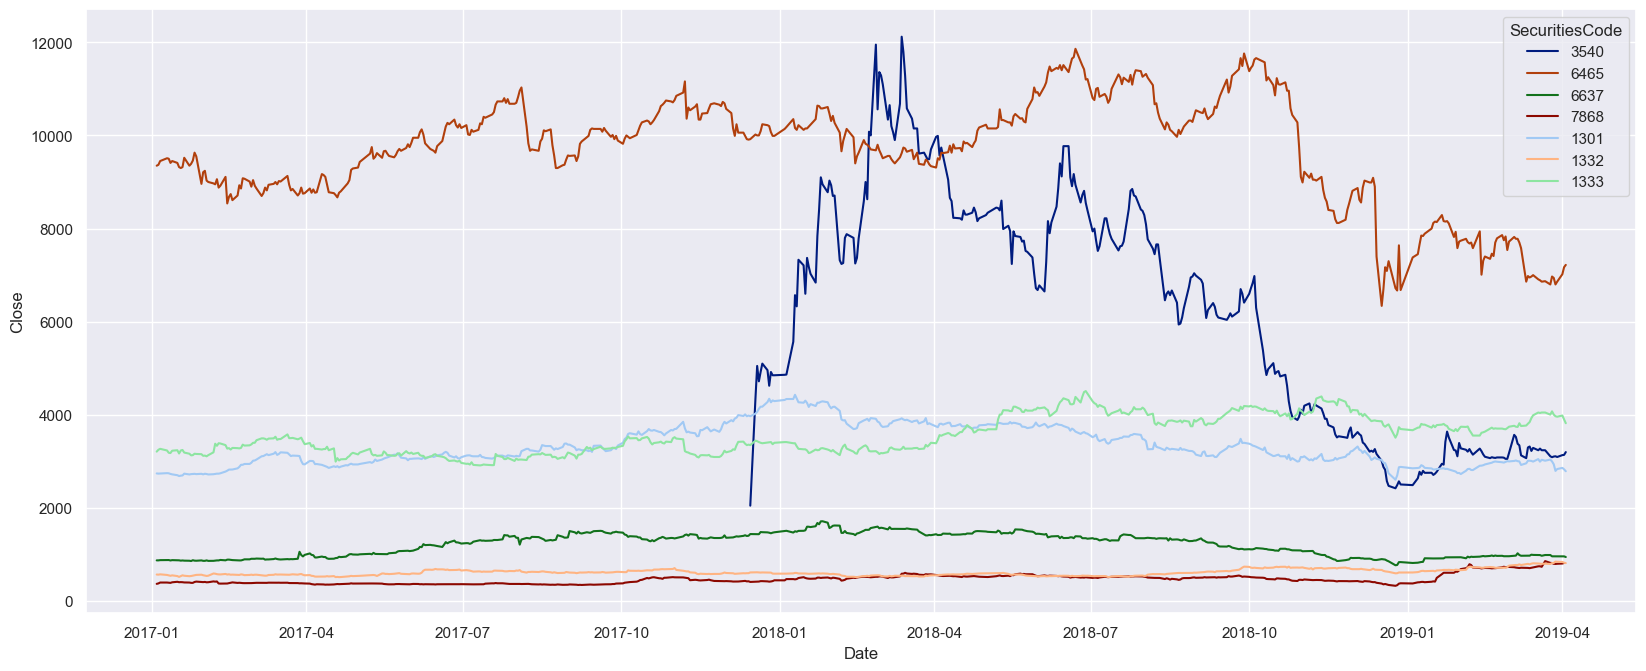

In [34]:
delist = df_price[df_price.SupervisionFlag == True].SecuritiesCode.unique()[1:]
normal = df_price[df_price.SupervisionFlag == False].SecuritiesCode.unique()[:3]
df_delist = df_price[df_price.SecuritiesCode.isin(delist)]
df_normal = df_price[df_price.SecuritiesCode.isin(normal)]

df = pd.concat([df_delist, df_normal], axis=0)
df.Date = pd.to_datetime(df.Date)

fig = plt.figure(figsize=(20, 8), dpi=100)
sns.lineplot(data=df[df.SecuritiesCode.isin(delist)], x='Date', y='Close', hue='SecuritiesCode', palette='dark')
sns.lineplot(data=df[df.SecuritiesCode.isin(normal)], x='Date', y='Close', hue='SecuritiesCode', palette='pastel')

In [26]:
df[(df.SecuritiesCode == 6502) & (df.SupervisionFlag==True)]


,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
92438,20170315_6502,2017-03-15,6502,199.9,205.5,186.5,189.5,379973000,1.0,NaN,True,0.035403
94305,20170316_6502,2017-03-16,6502,188.6,192.2,181.6,183.6,211415000,1.0,NaN,True,0.033666
96172,20170317_6502,2017-03-17,6502,198.0,199.0,186.3,190.1,237833000,1.0,NaN,True,-0.012723
98042,20170321_6502,2017-03-21,6502,187.0,197.1,186.5,196.5,124884000,1.0,NaN,True,0.068557
99914,20170322_6502,2017-03-22,6502,194.0,195.7,192.4,194.0,54887000,1.0,NaN,True,0.075736
...,...,...,...,...,...,...,...,...,...,...,...,...
351520,20171004_6502,2017-10-04,6502,313.0,315.0,308.0,311.0,15309000,1.0,NaN,True,0.009615
353404,20171005_6502,2017-10-05,6502,311.0,315.0,311.0,312.0,10625000,1.0,NaN,True,0.006349
355289,20171006_6502,2017-10-06,6502,315.0,322.0,314.0,315.0,27579000,1.0,NaN,True,0.003155
357174,20171010_6502,2017-10-10,6502,319.0,320.0,316.0,317.0,15881000,1.0,NaN,True,0.037736
